# Spatial Analysis Challenge

Can you figure out how to buffer each point in Layer A so that the buffer contains at exactly 5 points from Layer B? 

In [1]:
# import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

**Lectura de los datos**

In [2]:
# Read data
layer_a = gpd.read_file('data/sample_data.gpkg', layer='LayerA', driver='GPKG')
layer_b = gpd.read_file('data/sample_data.gpkg', layer='LayerB', driver='GPKG')

**Función para crear Buffer según la cantidad de puntos que deba contener**

In [3]:
# Function Buffer:
def bufferCount(inGdf, countGdf, numPoints):
    # Calculate distances
    distances = [pd.DataFrame(inGdf.geometry.distance(countGdf.geometry[i])) for i in range(len(countGdf))]
    distances = pd.concat(distances)
    distances = distances.sort_values(by=0) # Sort distances

    # Update distance in result
    result = inGdf.copy()
    for i in list(distances.index.unique()):
        dist5 = float(distances[distances.index==i].iloc[numPoints - 1]) # Distance N°5
        dist6 = float(distances[distances.index==i].iloc[numPoints])     # Distance N°6
        result.loc[[i],'distance'] = dist5 + (dist6 - dist5)/2

    # Calculate Buffer
    result['geometry'] = result.buffer(result['distance'])
    
    # Return
    return result

**Utilizando la función**

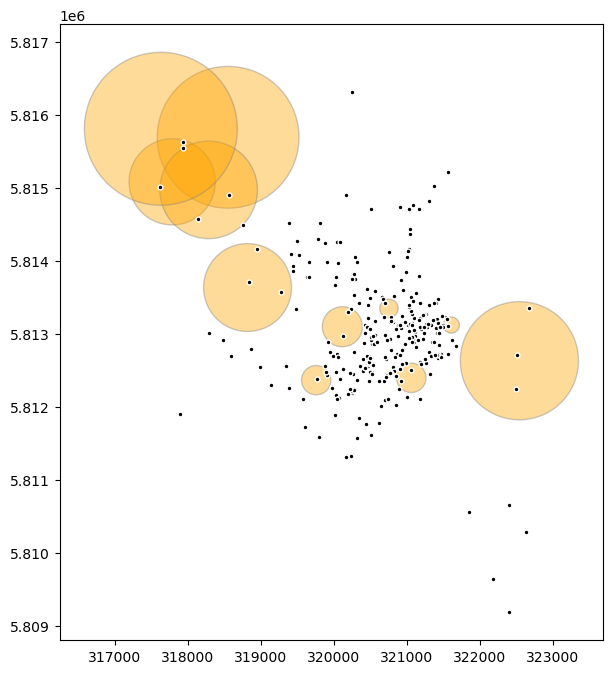

In [4]:
# Ejecutando la función para crear buffer que contenga 3 puntos
layer_a_buffer = bufferCount(layer_a, layer_b, 3)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
layer_a_buffer.plot(ax=ax, color='Orange', edgecolor='Gray', alpha=.4);
layer_b.plot(ax=ax, markersize=12, color='Black', edgecolor='White');

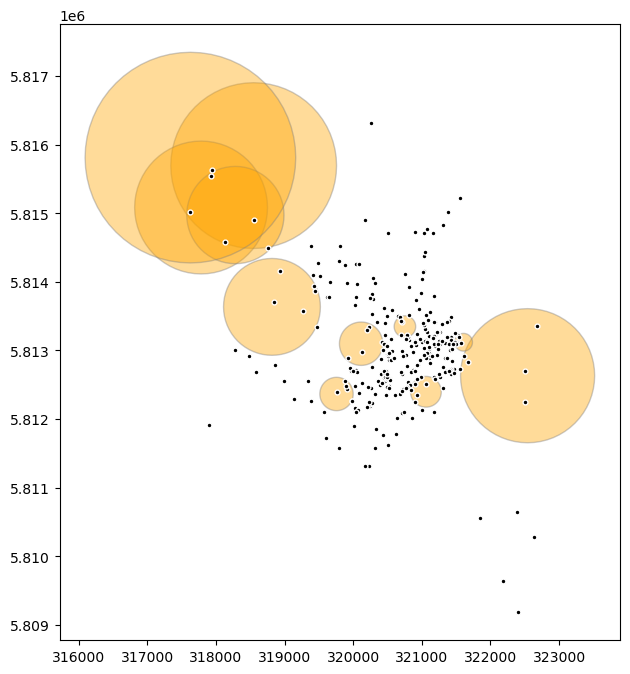

In [5]:
# Ejecutando la función para crear buffer que contenga 5 puntos
layer_a_buffer = bufferCount(layer_a, layer_b, 5)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
layer_a_buffer.plot(ax=ax, color='Orange', edgecolor='Gray', alpha=.4);
layer_b.plot(ax=ax, markersize=12, color='Black', edgecolor='White');

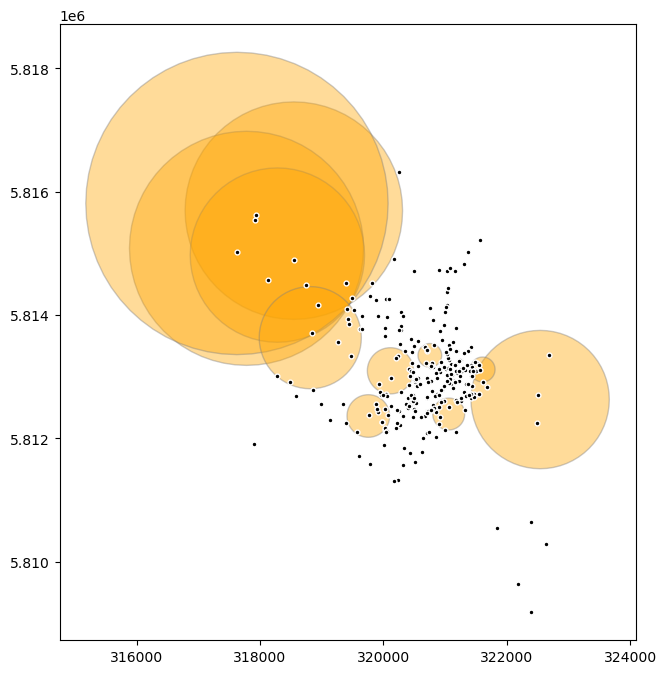

In [6]:
# Ejecutando la función para crear buffer que contenga 10 puntos
layer_a_buffer = bufferCount(layer_a, layer_b, 10)

# Plot
fig, ax = plt.subplots(figsize=(8,8))
layer_a_buffer.plot(ax=ax, color='Orange', edgecolor='Gray', alpha=.4);
layer_b.plot(ax=ax, markersize=12, color='Black', edgecolor='White');